In [2]:
import pandas as pd
import numpy as np
from ipywidgets import interact,IntSlider
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import seaborn as sn



In [3]:
data_train=r"C:\Users\josef\Downloads\DATASETS\Train_data.csv"
df_train=pd.read_csv(data_train)

In [4]:
dummy=pd.get_dummies(data=df_train,columns=["protocol_type","service","flag","class"],drop_first=True)
dummy

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,flag_RSTO,flag_RSTOS0,flag_RSTR,flag_S0,flag_S1,flag_S2,flag_S3,flag_SF,flag_SH,class_normal
0,0,491,0,0,0,0,0,0,0,0,...,False,False,False,False,False,False,False,True,False,True
1,0,146,0,0,0,0,0,0,0,0,...,False,False,False,False,False,False,False,True,False,True
2,0,0,0,0,0,0,0,0,0,0,...,False,False,False,True,False,False,False,False,False,False
3,0,232,8153,0,0,0,0,0,1,0,...,False,False,False,False,False,False,False,True,False,True
4,0,199,420,0,0,0,0,0,1,0,...,False,False,False,False,False,False,False,True,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25187,0,0,0,0,0,0,0,0,0,0,...,True,False,False,False,False,False,False,False,False,False
25188,0,334,0,0,0,0,0,0,1,0,...,False,False,False,False,False,False,False,True,False,False
25189,0,0,0,0,0,0,0,0,0,0,...,False,False,False,False,False,False,False,False,False,False
25190,0,0,0,0,0,0,0,0,0,0,...,False,False,False,True,False,False,False,False,False,False


In [4]:
dummy['class_normal'].value_counts()

class_normal
True     13449
False    11743
Name: count, dtype: int64

In [5]:
input_X = dummy.drop(columns=['class_normal'])  # Eliminar la variable objetivo 'class' de las características
target_y = dummy['class_normal']

In [6]:
target_y

0         True
1         True
2        False
3         True
4         True
         ...  
25187    False
25188    False
25189    False
25190    False
25191    False
Name: class_normal, Length: 25192, dtype: bool

In [7]:
X_train, X_test, y_train, y_test = train_test_split(input_X, target_y, test_size = 0.2,
random_state = 20)

In [8]:
X_train.shape, X_test.shape

((20153, 115), (5039, 115))

In [57]:
# Instanciar el modelo de clasificación con un número específico de árboles
model = RandomForestClassifier(n_estimators=1000)  # Puedes cambiar el número según sea necesario

# Entrenar el modelo
model.fit(X_train, y_train)


RandomForestClassifier(n_estimators=1000)

In [58]:
model.score(X_test,y_test)

0.9974201230402858

In [59]:
y_pred = model.predict(X_test)
y_pred

array([False,  True,  True, ...,  True,  True,  True])

In [60]:
cm= confusion_matrix(y_test,y_pred)
cm #TN FP FN TP

array([[2323,   11],
       [   2, 2703]], dtype=int64)

Text(95.72222222222221, 0.5, 'Verdadero')

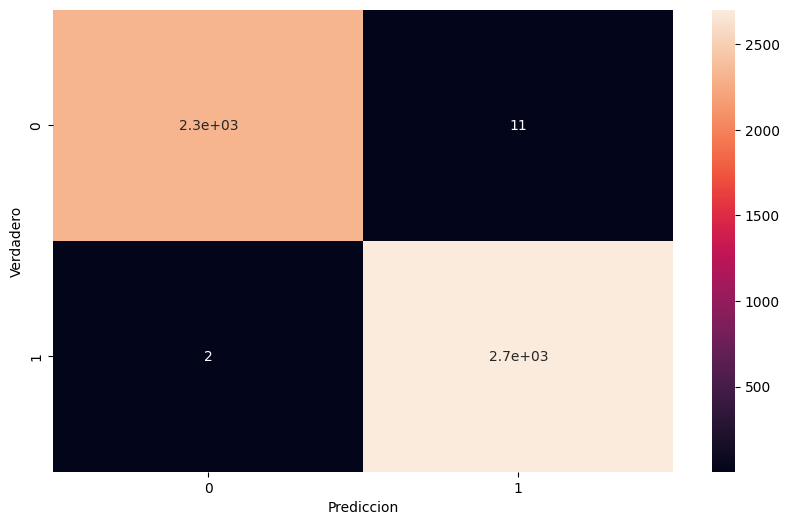

In [61]:
plt.figure(figsize=(10,6))
sn.heatmap(cm,annot=True)
plt.xlabel('Prediccion')
plt.ylabel('Verdadero')

protocol_type
tcp     20526
udp      3011
icmp     1655
Name: count, dtype: int64
